In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import functions
from colour_palette import _COLOUR_PALETTE

In [3]:
def get_pdb_matrix(pdb_file: str) -> np.ndarray:
    """
    Open a PDB file and return its adjacency matrix
    @param pdb_file: PDB file from either RCSB or AlphaFold (default)
    @return: adjacency matrix as a Numpy array
    """
    return functions.pdb_to_adjacency(pdb_file)[1]
    
def remove_diagonal_elements(matrix: np.ndarray):
    """
    Remove diagonal elements and add contacts to first off-diagonals
    @param matrix: adjacency matrix from simulations
    @return: simulation matrix with diagonals set to 1
    """
    np.fill_diagonal(matrix, 0)
    off_diagonal = np.ones(len(np.diag(matrix, 1)))
    np.fill_diagonal(matrix[1:], off_diagonal)
    np.fill_diagonal(matrix[:, 1:], off_diagonal)
    return matrix

In [16]:
total_matrix = np.load(f"../data/rcsb/adjacency_matrix_100.npy")
total_matrix.shape

(1000, 350, 350)

../data/rcsb/pdb_files/pdb3irw.ent
Progress: 1/12206


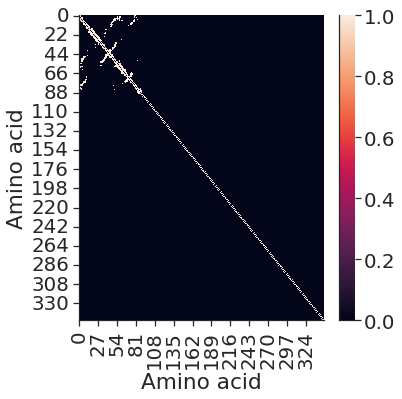

../data/rcsb/pdb_files/pdb4rt5.ent
Progress: 1/12206


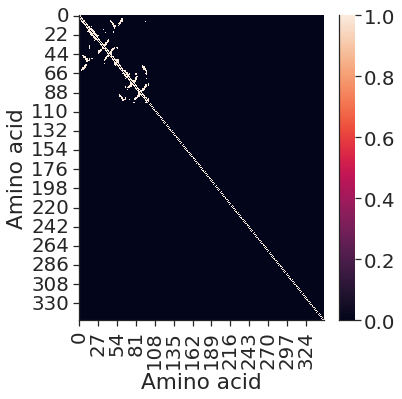

../data/rcsb/pdb_files/pdb7ab7.ent
Progress: 1/12206


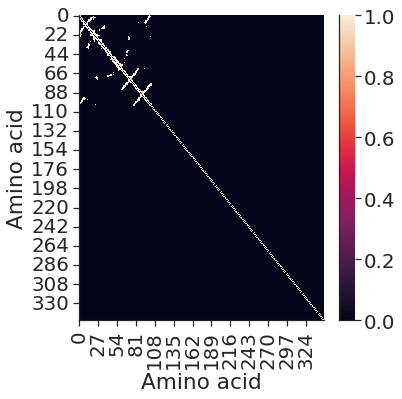

../data/rcsb/pdb_files/pdb3cn2.ent
Progress: 1/12206


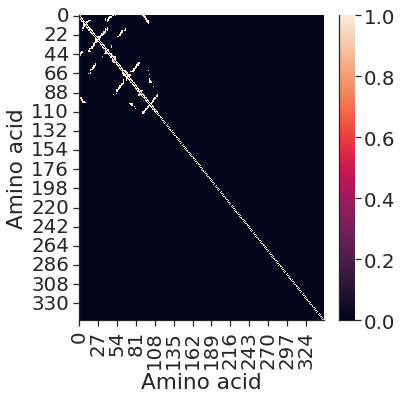

../data/rcsb/pdb_files/pdb5yo4.ent
Progress: 1/12206


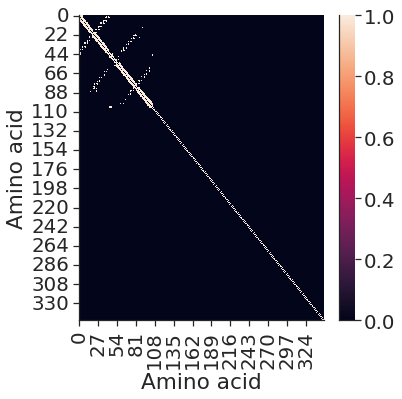

../data/rcsb/pdb_files/pdb3wa9.ent
Progress: 1/12206


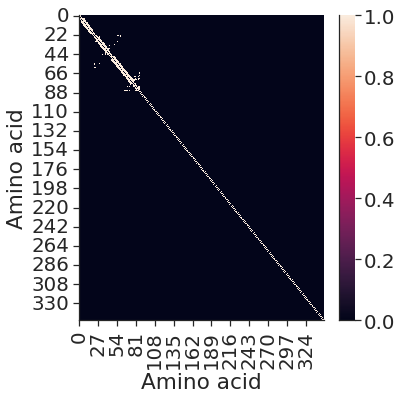

../data/rcsb/pdb_files/pdb4kmn.ent
Progress: 1/12206


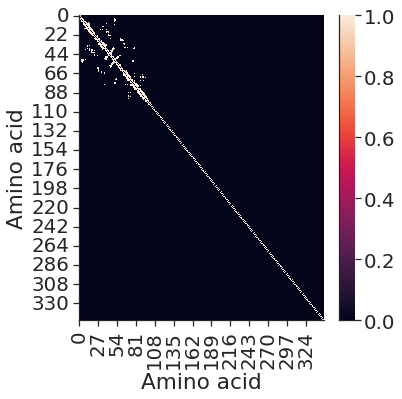

../data/rcsb/pdb_files/pdb2d8e.ent
Progress: 1/12206


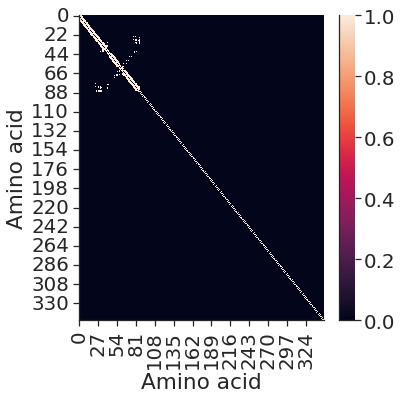

../data/rcsb/pdb_files/pdb5dtd.ent
Progress: 1/12206


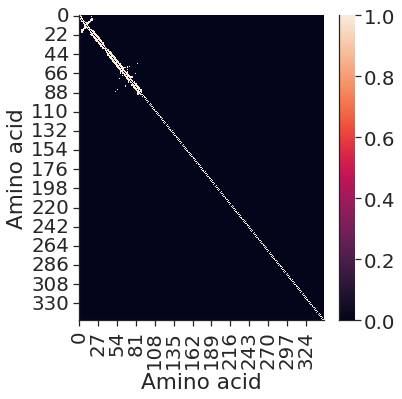

../data/rcsb/pdb_files/pdb5pes.ent
Progress: 1/12206


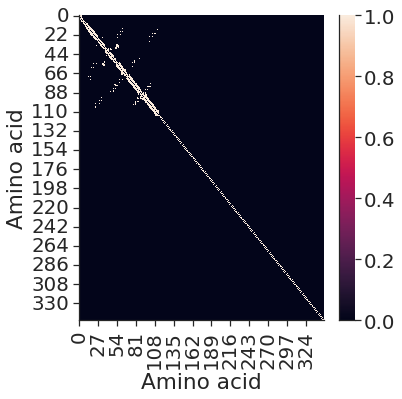

In [55]:
path_to_csv = "../data/rcsb/secondary_structures_100.csv"
dataframe = pd.read_csv(path_to_csv) 
pdb_filenames = dataframe["filename"].tolist()

all_adjacency_matrices_list = []
counter = 1

for pdb_filename in pdb_filenames[:1000]:
    print(pdb_filename)
    print(f"Progress: {counter}/{len(pdb_filenames)}")
    adjacency_matrix = get_pdb_matrix(pdb_filename) 
    rows, columns = adjacency_matrix.shape
    set_correct_rows = np.vstack([adjacency_matrix, np.zeros((350 - rows, columns), dtype=adjacency_matrix.dtype)])
    new_rows, _ = set_correct_rows.shape
    reshaping_columns = np.zeros((new_rows, 350 - columns))
    square_matrix = np.hstack((set_correct_rows, reshaping_columns))
    matrix = remove_diagonal_elements(square_matrix)
    plt.figure(figsize=(6, 6))
    sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=1.8, font="Helvetica")
    heatmap = sns.heatmap(matrix, cbar=True)
    heatmap.set_xlabel("Amino acid")
    heatmap.set_ylabel("Amino acid")
    sns.despine()
    plt.tight_layout()
    plt.show()
    all_adjacency_matrices_list.append(matrix)
    all_adjacency_matrices = np.array(all_adjacency_matrices_list) # UNTIL HERE WORKS FINE


13736.0
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


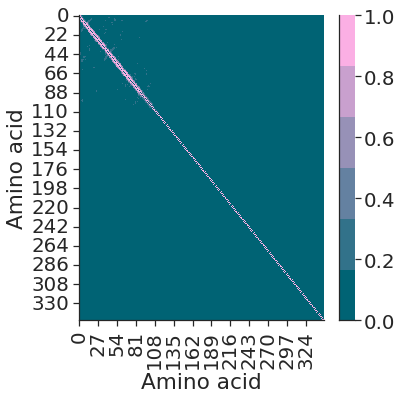

In [65]:
total_matrix = all_adjacency_matrices
n_total_counts = np.sum(total_matrix)
print(n_total_counts)
summed_elements = np.sum(total_matrix, axis=0) / len(total_matrix)
print(summed_elements)
# average_matrix = np.sum(total_matrix, axis=0) 
# average_matrix = summed_elements 
# print(summed_elements)
# matrix = remove_diagonal_elements(summed_elements) / n_total_counts
plt.figure(figsize=(6, 6))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=1.8, font="Helvetica")
colormap = sns.color_palette("blend:#006374,#fbafe4")

heatmap = sns.heatmap(summed_elements, cmap=colormap,cbar=True)
heatmap.set_xlabel("Amino acid")
heatmap.set_ylabel("Amino acid")
sns.despine()
plt.tight_layout()
# plt.xlim(0,22)
# plt.ylim(22, 0)
plt.show()

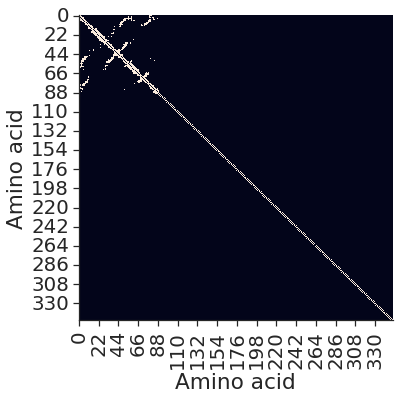

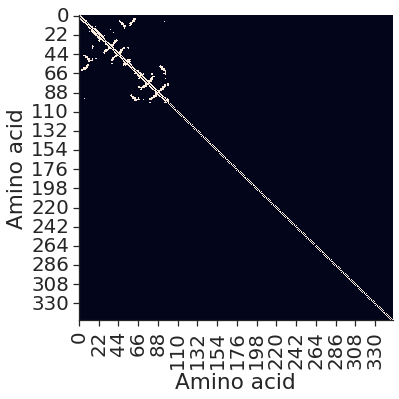

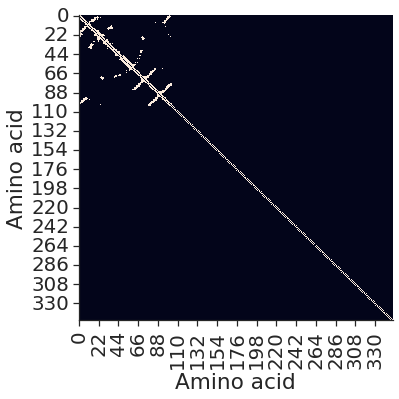

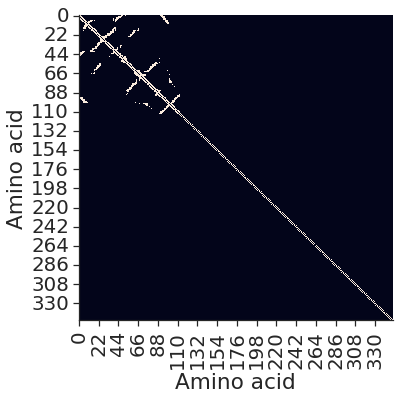

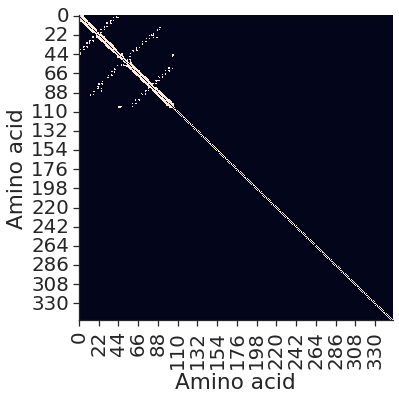

In [20]:
for matrix in total_matrix[:5]:
    adjacency_matrix = remove_diagonal_elements(matrix)
    plt.figure(figsize=(6, 6))
    sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=1.8, font="Helvetica")
    heatmap = sns.heatmap(adjacency_matrix, cbar=False)
    heatmap.set_xlabel("Amino acid")
    heatmap.set_ylabel("Amino acid")
    sns.despine()
    plt.tight_layout()
    plt.show()

In [15]:
avg = np.add(total_matrix, axis=0)
avg

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
n_total_counts = np.sum(total_matrix)
n_total_counts

924000.0

In [19]:
new = np.add(total_matrix, axis=0) / n_total_counts

TypeError: add() takes from 2 to 3 positional arguments but 1 were given

In [22]:
new = np.apply_over_axes(np.sum, total_matrix, [0]) / n_total_counts

In [25]:
new.shape

(1, 350, 350)